In [1]:
import numpy as np
import numpy as np
import pandas as pd
import loadData
import monteCarloClass
import time

In [2]:
# Publication-ready plot configuration
import matplotlib.pyplot as plt
import matplotlib as mpl

# Font sizes
FONT_SIZE_LABEL = 18  # Axis labels and tick labels
FONT_SIZE_TITLE = 20  # Plot titles
FONT_SIZE_LEGEND = 18  # Legend text

# Configure matplotlib parameters globally
plt.rcParams.update({
    # Font sizes
    'font.size': FONT_SIZE_LABEL,          # Base font size
    'axes.labelsize': FONT_SIZE_LABEL,     # X and Y axis labels
    'axes.titlesize': FONT_SIZE_TITLE,     # Subplot titles
    'xtick.labelsize': FONT_SIZE_LABEL,    # X tick labels
    'ytick.labelsize': FONT_SIZE_LABEL,    # Y tick labels
    'legend.fontsize': FONT_SIZE_LEGEND,   # Legend
    
    # Font family
    'font.family': 'sans-serif',
    'font.sans-serif': ['Arial', 'Helvetica', 'DejaVu Sans'],
    
    # Line widths
    'axes.linewidth': 1.5,                 # Axis border width
    'grid.linewidth': 1.0,                 # Grid line width
    'lines.linewidth': 2.0,                # Plot line width
    'lines.markersize': 8,                 # Default marker size
    
    # Tick parameters
    'xtick.major.width': 1.5,              # X tick width
    'ytick.major.width': 1.5,              # Y tick width
    'xtick.major.size': 6,                 # X tick length
    'ytick.major.size': 6,                 # Y tick length
    
    # Legend
    'legend.frameon': True,                # Legend frame
    'legend.framealpha': 0.8,              # Legend transparency
    'legend.edgecolor': 'black',           # Legend border color
    
    # Figure
    'figure.dpi': 100,                     # Display resolution
    'savefig.dpi': 300,                    # Save resolution for publication
    'savefig.bbox': 'tight',               # Tight bounding box
    'savefig.pad_inches': 0.1,             # Padding when saving
    
    # Grid
    'axes.grid': False,                    # No grid by default
    'grid.alpha': 0.3,                     # Grid transparency if enabled
})

print("✓ Publication-ready plot configuration loaded")
print(f"  - Axis labels/ticks: {FONT_SIZE_LABEL}pt")
print(f"  - Titles: {FONT_SIZE_TITLE}pt")
print(f"  - Save resolution: 300 DPI")

✓ Publication-ready plot configuration loaded
  - Axis labels/ticks: 18pt
  - Titles: 20pt
  - Save resolution: 300 DPI


load models


In [3]:
import os
import json
import glob
import pandas as pd
from pathlib import Path

def load_all_model_results():
    """Load all model fit results from the model_fits directory"""
    results = []
    
    # Find all JSON files in model_fits directory
    json_files = glob.glob("model_fits/**/*.json", recursive=True)



    
    
    for file_path in json_files:
  
        try:
            with open(file_path, 'r') as f:
                result = json.load(f)
            
            # Extract participant ID and model type from filename if not in data
            filename = os.path.basename(file_path)
            parts = filename.replace('.json', '').split('_')
            #print(parts)
            if 'participantID' not in result:
                result['participantID'] = parts[0]

            
            result['modelType'] = parts[1]+"_"+parts[3]
            
            if parts[2]!="LapseFree":
                #print("Lapse fixed model, skipping")
                continue

            # Skip results with specific model types
            excluded_models = ["gaussian_sharedPrior", "fusionOnly_sharedPrior", "probabilityMatching_sharedPrior", "switching_sharedPrior"]
            if any(model in result['modelType'] for model in excluded_models):
                # Skip this result
                os.remove(file_path)
                continue
            

            results.append(result)
            
        except Exception as e:
            print(f"Error loading {file_path}: {e}")
    
    return results

# Load all results
all_results = load_all_model_results()
print(f"Loaded {len(all_results)} model fit results")

# Convert to DataFrame for easier analysis
df_results = pd.DataFrame(all_results)
print(f"Participants: {sorted(df_results['participantID'].unique())}")
print(f"Models: {sorted(df_results['modelType'].unique())}\n number of models in comparison is: {len(df_results['modelType'].unique())} ")


Loaded 78 model fit results
Participants: ['all', 'as', 'dt', 'hh', 'ip', 'ln1', 'ln2', 'mh', 'ml', 'mt', 'oy', 'qs', 'sx']
Models: ['fusionOnlyLogNorm_sharedPrior', 'logLinearMismatch_sharedPrior', 'lognorm_sharedPrior', 'probabilityMatchingLogNorm_sharedPrior', 'selection_sharedPrior', 'switchingFree_sharedPrior']
 number of models in comparison is: 6 


In [4]:
# data, dataName = loadData.loadData("as_all.csv")
# intensityVariable = "deltaDurS"
# sensoryVar = "audNoise"
# standardVar = "standardDur"
# conflictVar = "conflictDur"
# #s
# visualStandardVar = "unbiasedVisualStandardDur"
# visualTestVar = "unbiasedVisualTestDur"
# audioStandardVar = "standardDur"
# audioTestVar = "testDurS"
# # Instantiate the Monte Carlo class
# mc_fitter = monteCarloClass.OmerMonteCarlo(data)
# print("Visual test duration range:", data["recordedDurVisualTest"].min(), "to", data["recordedDurVisualTest"].max())
# # fit parameters
# mc_fitter.nStart = 1 # Number of random starts for optimization
# mc_fitter.nSimul = 100 # small number of simulations for quick test
# mc_fitter.optimizationMethod= "bads"  # Use BADS for optimization
# mc_fitter.modelName = "lognorm"  # Set measurement distribution to Gaussian
# mc_fitter.integrationMethod = "analytical"  # Use numerical integration instead of analytical
# mc_fitter.freeP_c = False  # Allow different prior widths for conflict conditions
# mc_fitter.sharedLambda = False  # Use separate lapse rates for each condition
# mc_fitter.dataName = dataName
# #print("t_min, t_max:", mc_fitter.t_min, mc_fitter.t_max)

participantIds=sorted(df_results['participantID'].unique())
modelTypes=sorted(df_results['modelType'].unique())
nParticipants=len(participantIds)
nModels=len(modelTypes)

import fitSaver
import os
participantID="as"
modelType="fusionOnlyLogNorm"

# simulate



 Load data

In [5]:
# import bootstrapperSaveLoad functions
import matplotlib.pyplot as plt
from bootstrapperSaveLoad import saveBootstrappedParams, loadBootstrappedParams
import loadResults
import os
import json
import seaborn as sns

# PLot the posterior per participants

Functions

In [6]:
from scipy.stats import norm

# --- FUSION MODEL IMPLEMENTATION ---
def fusion_estimate(m_a, m_v, sigma_a, sigma_v):
    """Bayesian optimal integration of auditory and visual measurements."""
    # Calculate weights based on reliabilities (inverse variances)
    w_a = 1 / sigma_a**2
    w_v = 1 / sigma_v**2
    # Compute the fused estimate
    fused_estimate = (w_a * m_a + w_v * m_v) / (w_a + w_v)
    return fused_estimate

# --- CAUSAL INFERENCE MODEL IMPLEMENTATION ---
def p_single(m,sigma,t_min,t_max):
    """p(m | C=2) and Gaussian measurement noise N(m; y, sigma^2)."""
    hi_cdf= norm.cdf((t_max - m) /sigma)
    lo_cdf=norm.cdf((t_min-m)/sigma)
    return (hi_cdf-lo_cdf)/(t_max-t_min)

# Causal inference model for duration estimation
def L_C1(m_a,m_v,sigma_a,sigma_v,t_min,t_max):
    sigma_c_sq = (sigma_a**2 * sigma_v**2) / (sigma_a**2 + sigma_v**2)
    sigma_c = np.sqrt(sigma_c_sq)
    mu_c = (m_a / sigma_a**2 + m_v / sigma_v**2) / (1 / sigma_a**2 + 1 / sigma_v**2)

    hi_cdf = norm.cdf((t_max-mu_c)/sigma_c)
    lo_cdf = norm.cdf((t_min-mu_c)/sigma_c)
    
    expo = np.exp(-(m_a-m_v)**2/(2*(sigma_a**2+sigma_v**2)))
    
    prior = 1/(t_max-t_min)
    return prior * sigma_c/np.sqrt(sigma_a**2 * sigma_v**2) * (hi_cdf-lo_cdf) * expo

def L_C1_no_prior(m_a, m_v, sigma_a, sigma_v):
    """Likelihood of common source without prior and bounding."""
    sigma_c_sq = (sigma_a**2 * sigma_v**2) / (sigma_a**2 + sigma_v**2)
    sigma_c = np.sqrt(sigma_c_sq)
    mu_c = (m_a / sigma_a**2 + m_v / sigma_v**2) / (1 / sigma_a**2 + 1 / sigma_v**2)
    
    expo = np.exp(-(m_a - m_v)**2 / (2 * (sigma_a**2 + sigma_v**2)))
    
    return sigma_c / np.sqrt(sigma_a**2 * sigma_v**2) * expo



def L_C2(m_a,m_v,sigma_a,sigma_v,t_min,t_max):
    """ Likelihood of separate sources: product of two marginal likelihoods 
        two integral over two hidden duration y_a y_v"""
    return p_single(m_a,sigma_a,t_min,t_max) * p_single(m_v,sigma_v,t_min,t_max)


def L_C2_no_prior(m_a, m_v, sigma_a, sigma_v):
    """Likelihood of separate sources without prior and bounding."""
    return norm.pdf(m_a, loc=m_a, scale=sigma_a) * norm.pdf(m_v, loc=m_v, scale=sigma_v)

def posterior_C1(m_a,m_v,sigma_a,sigma_v,p_c,t_min,t_max):
    """ Posterior probability of common cause P(C=1 | m_a,m_v) """
    # Likelihoods under each causal structure
    L1 = L_C1(m_a,m_v,sigma_a,sigma_v,t_min,t_max)
    L2 = L_C2(m_a,m_v,sigma_a,sigma_v,t_min,t_max)


    post_C1= (L1 * p_c) / (L1 * p_c + L2 * (1 - p_c))
    return post_C1

    # # Unnormalized posteriors
    # post_C1_unnorm = L1 * p_c
    # post_C2_unnorm = L2 * (1 - p_c)
    # # Normalization constant
    # norm_const = post_C1_unnorm + post_C2_unnorm
    

    # # Posterior probabilities
    # post_C1 = post_C1_unnorm / norm_const
    # return post_C1


Plot posterior commons liklihoods of common and separate sources

In [7]:
FONT_SIZE_LABEL

18

In [36]:
FONTSIZE_MP = 20   # font size for multi-participant figure

def plot_likelihood_components(sigma_a=0.3, sigma_v=0.3, p_c=0.5, t_min=0.1, t_max=3,
                               measurement="log-space", nSimul=2000, axes=None, show_plot=True,
                               show_titles=True, show_xticks=True):
    """
    Plot log P(m_a,m_v|C=1), log P(m_a,m_v|C=2), log-likelihood ratio, and posterior
    P(C=1|m_a,m_v) across conflict levels.  Expects axes with 4 subplots.
    """
    conflicts = np.linspace(-0.25, +0.25, 300)
    L1_means, L2_means, post_c_means, log_ratio_means = [], [], [], []

    S_a_s = 0.5
    for conflict in conflicts:
        S_v_s = S_a_s + conflict
        if measurement == "log-space" and S_v_s <= 0:
            L1_means.append(np.nan); L2_means.append(np.nan)
            log_ratio_means.append(np.nan); post_c_means.append(np.nan)
            continue

        if measurement == "log-space":
            m_a_s = np.random.normal(np.log(S_a_s), sigma_a, nSimul)
            m_v_s = np.random.normal(np.log(S_v_s), sigma_v, nSimul)
            t_min_use, t_max_use = np.log(t_min), np.log(t_max)
        else:
            m_a_s = np.random.normal(S_a_s, sigma_a, nSimul)
            m_v_s = np.random.normal(S_v_s, sigma_v, nSimul)
            t_min_use, t_max_use = t_min, t_max

        L1 = L_C1(m_a_s, m_v_s, sigma_a, sigma_v, t_min_use, t_max_use)
        L2 = L_C2(m_a_s, m_v_s, sigma_a, sigma_v, t_min_use, t_max_use)
        L1_means.append(np.mean(L1))
        L2_means.append(np.mean(L2))

        post_c1 = posterior_C1(m_a_s, m_v_s, sigma_a, sigma_v, p_c, t_min_use, t_max_use)
        post_c_means.append(np.mean(post_c1))

        with np.errstate(divide='ignore', invalid='ignore'):
            log_ratio_means.append(np.mean(np.log(L1) - np.log(L2)))

    # Colours — same as manuscript figure
    c1_col, c2_col, ratio_col, post_col, prior_col = (
        '#3498db', '#e74c3c', '#e67e22', '#2ecc71', '#9b59b6')

    if axes is None and show_plot:
        fig, axes = plt.subplots(1, 4, figsize=(24, 5))
        plt.subplots_adjust(wspace=0.4)
        created_fig = True
    else:
        created_fig = False

    if show_plot:
        conflicts_ms = np.array(conflicts) * 1000
        log_L1_means = np.log(L1_means)
        log_L2_means = np.log(L2_means)

        # --- Column 0: log P(m_a, m_v | C=1) ---
        axes[0].plot(conflicts_ms, log_L1_means, color=c1_col, linewidth=2.5)
        axes[0].fill_between(conflicts_ms, np.nanmin(log_L1_means), log_L1_means,
                             alpha=0.15, color=c1_col)
        axes[0].axvline(0, color='gray', ls='--', lw=0.8, alpha=0.5)
        axes[0].set_ylabel(r'$\log\, P(m_a, m_v \mid C{=}1)$', fontsize=FONTSIZE_MP)
        if show_titles:
            axes[0].set_title(r'$\log\, P(m_a, m_v \mid C{=}1)$',
                              fontsize=FONTSIZE_MP, pad=10)
        axes[0].spines['top'].set_visible(False); axes[0].spines['right'].set_visible(False)
        axes[0].tick_params(labelsize=FONTSIZE_MP)

        # --- Column 1: log P(m_a, m_v | C=2) ---
        axes[1].plot(conflicts_ms, log_L2_means, color=c2_col, linewidth=2.5)
        axes[1].fill_between(conflicts_ms, np.nanmin(log_L2_means), log_L2_means,
                             alpha=0.15, color=c2_col)
        axes[1].axvline(0, color='gray', ls='--', lw=0.8, alpha=0.5)
        axes[1].set_ylabel(r'$\log\, P(m_a, m_v \mid C{=}2)$', fontsize=FONTSIZE_MP)
        if show_titles:
            axes[1].set_title(r'$\log\, P(m_a, m_v \mid C{=}2)$',
                              fontsize=FONTSIZE_MP, pad=10)
        axes[1].spines['top'].set_visible(False); axes[1].spines['right'].set_visible(False)
        axes[1].tick_params(labelsize=FONTSIZE_MP)

        # --- Column 2: log-likelihood ratio ---
        axes[2].plot(conflicts_ms, log_ratio_means, color=ratio_col, linewidth=2.5)
        axes[2].fill_between(conflicts_ms, 0, log_ratio_means, alpha=0.15, color=ratio_col)
        axes[2].axhline(0, color='gray', ls='-', lw=0.8, alpha=0.5)
        axes[2].axvline(0, color='gray', ls='--', lw=0.8, alpha=0.5)
        axes[2].set_ylabel(r'$\log\,\frac{P(m_a, m_v \mid C{=}1)}{P(m_a, m_v \mid C{=}2)}$',
                           fontsize=FONTSIZE_MP)
        if show_titles:
            axes[2].set_title('Log-likelihood ratio', fontsize=FONTSIZE_MP, pad=10)
        axes[2].spines['top'].set_visible(False); axes[2].spines['right'].set_visible(False)
        axes[2].tick_params(labelsize=FONTSIZE_MP)

        # --- Column 3: posterior P(C=1 | m_a, m_v) ---
        axes[3].plot(conflicts_ms, post_c_means, color=post_col, linewidth=2.5)
        axes[3].fill_between(conflicts_ms, 0, post_c_means, alpha=0.15, color=post_col)
        axes[3].axhline(0.5, color='gray', ls='-', lw=0.8, alpha=0.5)
        axes[3].axhline(p_c, color=prior_col, ls=':', lw=2, alpha=0.8,
                        label=f'Prior $p_c = {p_c:.2f}$')
        axes[3].axvline(0, color='gray', ls='--', lw=0.8, alpha=0.5)
        axes[3].set_ylabel(r'$P(C{=}1 \mid m_a, m_v)$', fontsize=FONTSIZE_MP)
        if show_titles:
            axes[3].set_title(r'$P(C{=}1 \mid m_a, m_v)$', fontsize=FONTSIZE_MP, pad=10)
        axes[3].set_ylim([0, 1])
        axes[3].legend(fontsize=FONTSIZE_MP - 2, loc='lower left')
        axes[3].spines['top'].set_visible(False); axes[3].spines['right'].set_visible(False)
        axes[3].tick_params(labelsize=FONTSIZE_MP)

        # x-axis ticks
        x_ticks = [-250, -167, -83, 0, 83, 167, 250]
        if show_xticks:
            for ax in axes:
                ax.set_xticks(x_ticks)
                ax.set_xticklabels([str(t) for t in x_ticks],
                                   fontsize=FONTSIZE_MP, rotation=45)
        else:
            for ax in axes:
                ax.set_xticks(x_ticks)
                ax.set_xticklabels([])

        if created_fig:
            plt.tight_layout()

    return conflicts, L1_means, L2_means, post_c_means


def plotPosteriorsPerSubj(participantIds, modelTypes, parameterToPLot="mu"):
    lenSubjs = len(participantIds)
    nNoiseLevels = 2   # low and high noise
    nPlotsPerNoise = 4  # log P(m|C=1), log P(m|C=2), ratio, posterior

    fig, axes = plt.subplots(
        lenSubjs, nNoiseLevels * nPlotsPerNoise,
        figsize=(5 * nNoiseLevels * nPlotsPerNoise, 5 * lenSubjs),
        dpi=150, squeeze=False
    )
    plt.subplots_adjust(hspace=0.35, wspace=0.35, top=0.95)

    noise_labels = {0.1: "Low noise", 1.2: "High noise"}

    for pNum, participantID in enumerate(participantIds):
        for j, audioNoiseLevel in enumerate([0.1, 1.2]):
            data, dataName = loadData.loadData(participantID + "_all.csv", verbose=False)
            mc_fitter = monteCarloClass.OmerMonteCarlo(data)
            mc_fitter.modelName = "lognorm"
            mc_fitter.freeP_c = False
            mc_fitter.sharedLambda = False
            mc_fitter.dataName = dataName
            res = loadResults.loadFitResults(mc_fitter, dataName, modelName=mc_fitter.modelName)
            mc_fitter.modelFit = res['fittedParams']

            sigma_v = mc_fitter.modelFit[2]
            p_c     = mc_fitter.modelFit[3]
            sigma_a = mc_fitter.modelFit[1] if audioNoiseLevel == 0.1 else mc_fitter.modelFit[4]

            start_col = j * nPlotsPerNoise
            subplot_axes = [axes[pNum, start_col + k] for k in range(nPlotsPerNoise)]

            first_row = (pNum == 0)
            last_row  = (pNum == lenSubjs - 1)

            plot_likelihood_components(
                sigma_a=sigma_a, sigma_v=sigma_v, p_c=p_c,
                t_min=mc_fitter.data_t_min, t_max=mc_fitter.data_t_max,
                measurement="log-space", nSimul=2000,
                axes=subplot_axes, show_plot=True,
                show_titles=first_row,
                show_xticks=last_row
            )

            # Noise-level label on top of each block (first row only)
            if first_row:
                noise_label = noise_labels[audioNoiseLevel]
                for k in range(nPlotsPerNoise):
                    old = subplot_axes[k].get_title()
                    subplot_axes[k].set_title(
                        f"{noise_label}\n{old}" if old else noise_label,
                        fontsize=FONTSIZE_MP, pad=10
                    )
                subplot_axes[1].set_xlabel('Conflict (ms)', fontsize=FONTSIZE_MP)
                subplot_axes[2].set_xlabel('Conflict (ms)', fontsize=FONTSIZE_MP)

        # Participant label on leftmost y-axis of each row
        current_ylabel = axes[pNum, 0].get_ylabel()
        axes[pNum, 0].set_ylabel(
            f'{participantID.upper()}\n{current_ylabel}', fontsize=FONTSIZE_MP)

    plt.suptitle(r"$\log\,P(m_a, m_v \mid C)$, log-likelihood ratio and $P(C{=}1 \mid m_a, m_v)$ per participant",
                 fontsize=FONTSIZE_MP + 2, y=0.995)
    plt.tight_layout()
    plt.show()

# Run
plotPosteriorsPerSubj(participantIds[1:], modelTypes, parameterToPLot="mu")

**Figure caption (multi-participant version):** Log-likelihood ratio and posterior probability of a common cause as a function of audiovisual duration conflict for each participant. Columns are grouped by auditory noise condition: the left pair shows low noise and the right pair shows high noise. For each condition, the first column displays the log-likelihood ratio $\log\bigl[P(\mathbf{m}\mid C{=}1)\,/\,P(\mathbf{m}\mid C{=}2)\bigr]$, where $\mathbf{m}=(m_a,m_v)$ denotes the auditory and visual measurements; values above zero favour a common-cause interpretation. The second column shows the posterior probability $P(C{=}1 \mid \mathbf{m})$, with the dotted purple line indicating the fitted prior $p_c$. Both quantities are computed via Monte Carlo sampling using participant-specific sensory-noise parameters ($\sigma_a$, $\sigma_v$) and common-cause prior ($p_c$) estimated under the log-normal causal-inference model-averaging strategy.

---

**Figure caption (manuscript, participant DT):** Marginal likelihoods of the measurements and posterior probability of a common cause for an example participant (DT), plotted as a function of audiovisual duration conflict. The top row shows the low-auditory-noise condition; the bottom row shows the high-auditory-noise condition. From left to right: (1) the log marginal likelihood under a common cause, $\log P(m_a, m_v \mid C{=}1)$; (2) the log marginal likelihood under separate causes, $\log P(m_a, m_v \mid C{=}2)$; (3) the log-likelihood ratio $\log\bigl[P(m_a, m_v \mid C{=}1)\,/\,P(m_a, m_v \mid C{=}2)\bigr]$, where values above zero favour a common-cause interpretation; and (4) the posterior probability of a common cause, $P(C{=}1 \mid m_a, m_v)$, with the dotted purple line marking the fitted prior $p_c$. All quantities were computed via Monte Carlo simulation (5 000 samples per conflict level) using participant-specific sensory-noise estimates ($\sigma_a$, $\sigma_v$) and the common-cause prior ($p_c$) obtained from the log-normal causal-inference model-averaging fit. The posterior remains well above 0.5 across all conflict levels for this participant, indicating that this observer's data are consistent with treating the auditory and visual signals as originating from a common source regardless of the imposed conflict. This finding explains why the causal-inference and forced-fusion models produce similar predictions for this participant.

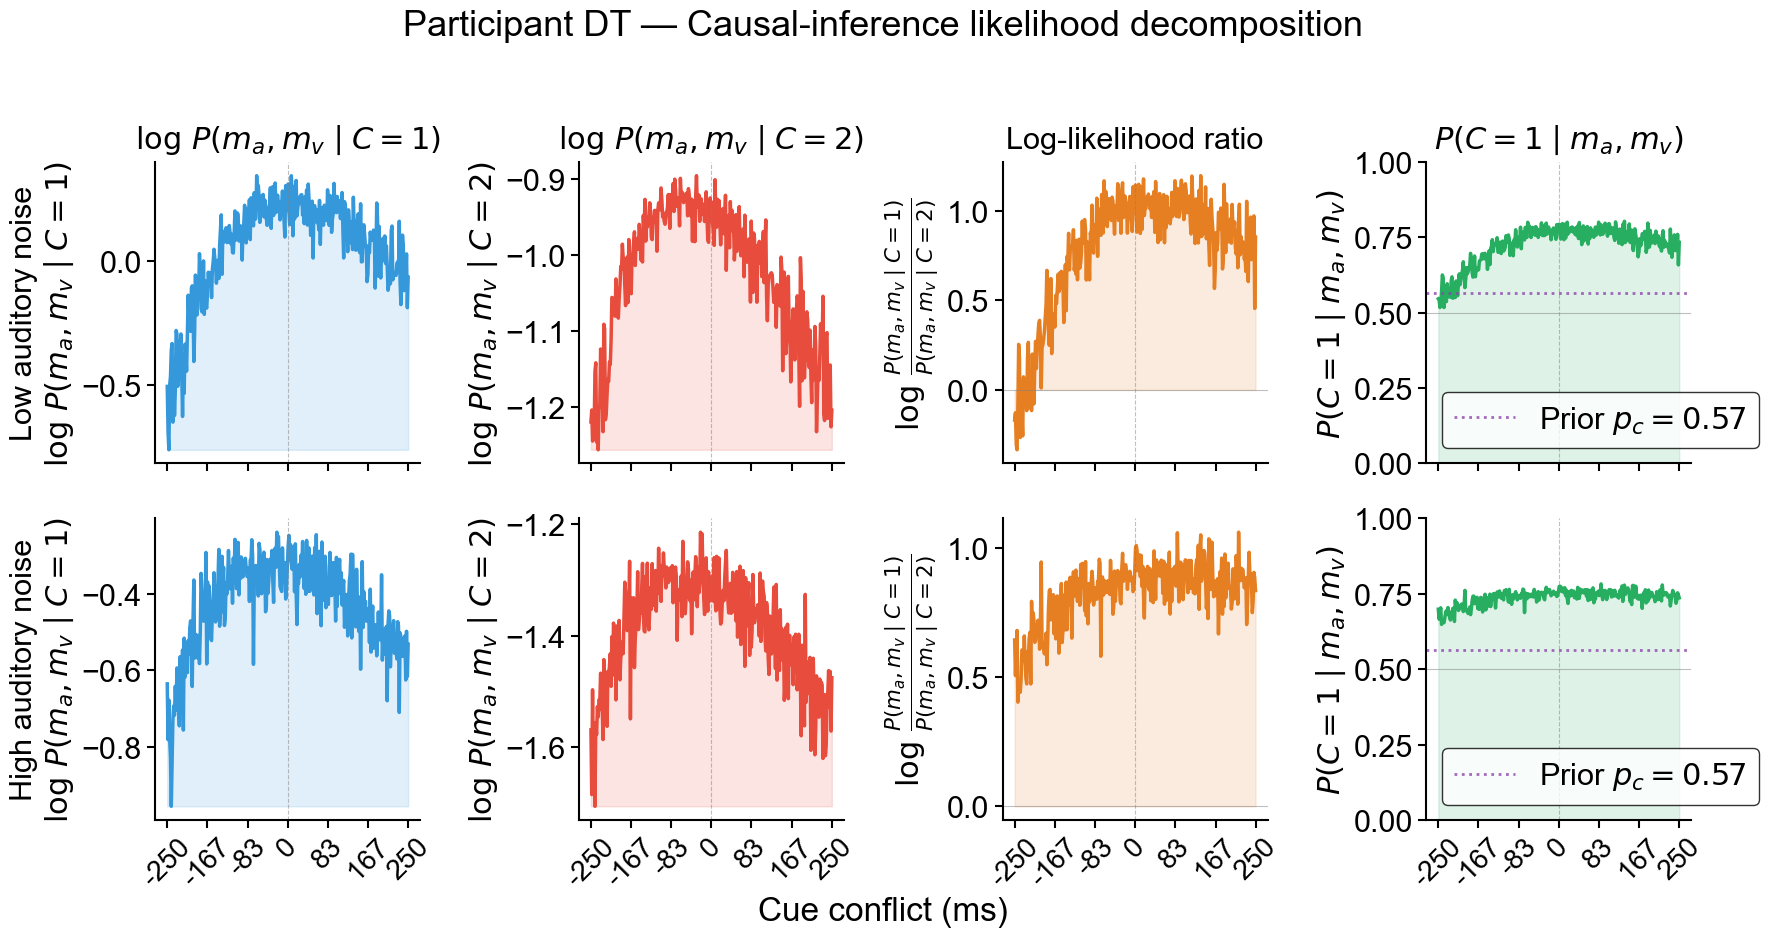

Saved manuscript_posterior_dt.png/.pdf


In [37]:
# Participant DT (index 2) — manuscript figure
# Layout: 2 rows (low noise top, high noise bottom) × 4 columns
# Columns: log P(m_a,m_v|C=1), log P(m_a,m_v|C=2), log-likelihood ratio, posterior P(C=1|m_a,m_v)

import matplotlib.pyplot as plt
import numpy as np

FONTSIZE = 22

def plot_all_four_panels(sigma_a, sigma_v, p_c, t_min, t_max,
                         measurement="log-space", nSimul=5000, axes=None,
                         show_titles=True, show_xlabel=True):
    """
    Plot log P(m_a,m_v|C=1), log P(m_a,m_v|C=2), log-likelihood ratio, and posterior P(C=1|m_a,m_v)
    across conflict levels.  Expects axes with 4 subplots.
    """
    conflicts = np.linspace(-0.25, +0.25, 300)
    L1_means, L2_means, log_ratio_means, post_c_means = [], [], [], []

    S_a_s = 0.5
    for conflict in conflicts:
        S_v_s = S_a_s + conflict
        if measurement == "log-space" and S_v_s <= 0:
            L1_means.append(np.nan); L2_means.append(np.nan)
            log_ratio_means.append(np.nan); post_c_means.append(np.nan)
            continue

        if measurement == "log-space":
            m_a = np.random.normal(np.log(S_a_s), sigma_a, nSimul)
            m_v = np.random.normal(np.log(S_v_s), sigma_v, nSimul)
            t_lo, t_hi = np.log(t_min), np.log(t_max)
        else:
            m_a = np.random.normal(S_a_s, sigma_a, nSimul)
            m_v = np.random.normal(S_v_s, sigma_v, nSimul)
            t_lo, t_hi = t_min, t_max

        l1 = L_C1(m_a, m_v, sigma_a, sigma_v, t_lo, t_hi)
        l2 = L_C2(m_a, m_v, sigma_a, sigma_v, t_lo, t_hi)
        L1_means.append(np.mean(l1))
        L2_means.append(np.mean(l2))

        pc1 = posterior_C1(m_a, m_v, sigma_a, sigma_v, p_c, t_lo, t_hi)
        post_c_means.append(np.mean(pc1))

        with np.errstate(divide='ignore', invalid='ignore'):
            log_ratio_means.append(np.mean(np.log(l1) - np.log(l2)))

    x = np.array(conflicts) * 1000  # convert to ms
    log_L1 = np.log(L1_means)
    log_L2 = np.log(L2_means)

    # Colours
    c1_col, c2_col, ratio_col, post_col, prior_col = (
        '#3498db', '#e74c3c', '#e67e22', '#27ae60', '#8e44ad')

    # --- Column 0: log P(m_a, m_v | C=1) ---
    ax = axes[0]
    ax.plot(x, log_L1, color=c1_col, linewidth=2.5)
    ax.fill_between(x, np.nanmin(log_L1), log_L1, alpha=0.15, color=c1_col)
    ax.axvline(0, color='gray', ls='--', lw=0.8, alpha=0.5)
    ax.set_ylabel(r'$\log\, P(m_a, m_v \mid C{=}1)$', fontsize=FONTSIZE)
    if show_titles:
        ax.set_title(r'$\log\, P(m_a, m_v \mid C{=}1)$', fontsize=FONTSIZE, pad=10)
    ax.spines['top'].set_visible(False); ax.spines['right'].set_visible(False)
    ax.tick_params(labelsize=FONTSIZE)

    # --- Column 1: log P(m_a, m_v | C=2) ---
    ax = axes[1]
    ax.plot(x, log_L2, color=c2_col, linewidth=2.5)
    ax.fill_between(x, np.nanmin(log_L2), log_L2, alpha=0.15, color=c2_col)
    ax.axvline(0, color='gray', ls='--', lw=0.8, alpha=0.5)
    ax.set_ylabel(r'$\log\, P(m_a, m_v \mid C{=}2)$', fontsize=FONTSIZE)
    if show_titles:
        ax.set_title(r'$\log\, P(m_a, m_v \mid C{=}2)$', fontsize=FONTSIZE, pad=10)
    ax.spines['top'].set_visible(False); ax.spines['right'].set_visible(False)
    ax.tick_params(labelsize=FONTSIZE)

    # --- Column 2: log-likelihood ratio ---
    ax = axes[2]
    ax.plot(x, log_ratio_means, color=ratio_col, linewidth=2.5)
    ax.fill_between(x, 0, log_ratio_means, alpha=0.15, color=ratio_col)
    ax.axhline(0, color='gray', ls='-', lw=0.8, alpha=0.5)
    ax.axvline(0, color='gray', ls='--', lw=0.8, alpha=0.5)
    ax.set_ylabel(r'$\log\,\frac{P(m_a, m_v \mid C{=}1)}{P(m_a, m_v \mid C{=}2)}$',
                  fontsize=FONTSIZE)
    if show_titles:
        ax.set_title('Log-likelihood ratio', fontsize=FONTSIZE, pad=10)
    ax.spines['top'].set_visible(False); ax.spines['right'].set_visible(False)
    ax.tick_params(labelsize=FONTSIZE)

    # --- Column 3: posterior P(C=1 | m_a, m_v) ---
    ax = axes[3]
    ax.plot(x, post_c_means, color=post_col, linewidth=2.5)
    ax.fill_between(x, 0, post_c_means, alpha=0.15, color=post_col)
    ax.axhline(0.5, color='gray', ls='-', lw=0.8, alpha=0.5)
    ax.axhline(p_c, color=prior_col, ls=':', lw=2, alpha=0.8,
               label=f'Prior $p_c = {p_c:.2f}$')
    ax.axvline(0, color='gray', ls='--', lw=0.8, alpha=0.5)
    ax.set_ylabel(r'$P(C{=}1 \mid m_a, m_v)$', fontsize=FONTSIZE)
    if show_titles:
        ax.set_title(r'$P(C{=}1 \mid m_a, m_v)$', fontsize=FONTSIZE, pad=10)
    ax.set_ylim([0, 1])
    ax.legend(fontsize=FONTSIZE , loc='lower left')
    ax.spines['top'].set_visible(False); ax.spines['right'].set_visible(False)
    ax.tick_params(labelsize=FONTSIZE)

    # x-axis ticks
    x_ticks = [-250, -167, -83, 0, 83, 167, 250]
    if show_xlabel:
        for a in axes:
            a.set_xticks(x_ticks)
            a.set_xticklabels([str(t) for t in x_ticks], fontsize=20, rotation=45) 

    else:
        for a in axes:
            a.set_xticks(x_ticks)
            a.set_xticklabels([])


# ── Build the 2-row × 4-col figure for participant DT ──────────────
participant_idx = 2  # DT
participantID = participantIds[participant_idx]

fig, axes = plt.subplots(2, 4, figsize=(18,9), squeeze=False)
plt.subplots_adjust(hspace=0.35, wspace=0.40)

noise_levels = [0.1, 1.2]
noise_labels = {0.1: 'Low auditory noise', 1.2: 'High auditory noise'}

for row, audioNoiseLevel in enumerate(noise_levels):
    data, dataName = loadData.loadData(participantID + "_all.csv", verbose=False)
    mc_fitter = monteCarloClass.OmerMonteCarlo(data)
    mc_fitter.modelName = "lognorm"
    mc_fitter.freeP_c = False
    mc_fitter.sharedLambda = False
    mc_fitter.dataName = dataName
    res = loadResults.loadFitResults(mc_fitter, dataName, modelName=mc_fitter.modelName)
    mc_fitter.modelFit = res['fittedParams']

    sigma_v = mc_fitter.modelFit[2]
    p_c     = mc_fitter.modelFit[3]
    sigma_a = mc_fitter.modelFit[1] if audioNoiseLevel == 0.1 else mc_fitter.modelFit[4]

    row_axes = [axes[row, c] for c in range(4)]

    plot_all_four_panels(
        sigma_a=sigma_a, sigma_v=sigma_v, p_c=p_c,
        t_min=mc_fitter.data_t_min, t_max=mc_fitter.data_t_max,
        measurement="log-space", nSimul=50,
        axes=row_axes,
        show_titles=(row == 0),
        show_xlabel=(row == 1),
    )

    # Row label on leftmost panel
    current_ylabel = row_axes[0].get_ylabel()
    row_axes[0].set_ylabel(
        f'{noise_labels[audioNoiseLevel]}\n{current_ylabel}', fontsize=FONTSIZE)

fig.suptitle(f'Participant {participantID.upper()} — Causal-inference likelihood decomposition',
             fontsize=FONTSIZE+4, y=1.01)
plt.tight_layout(rect=(0, 0, 1, 0.98))
fig.supxlabel('Cue conflict (ms)', fontsize=FONTSIZE+2, y=-0.01)

fig.savefig(f"manuscript_posterior_{participantID}.png", dpi=600, bbox_inches='tight')
fig.savefig(f"manuscript_posterior_{participantID}.pdf", dpi=900, bbox_inches='tight')
plt.show()
print(f"Saved manuscript_posterior_{participantID}.png/.pdf")

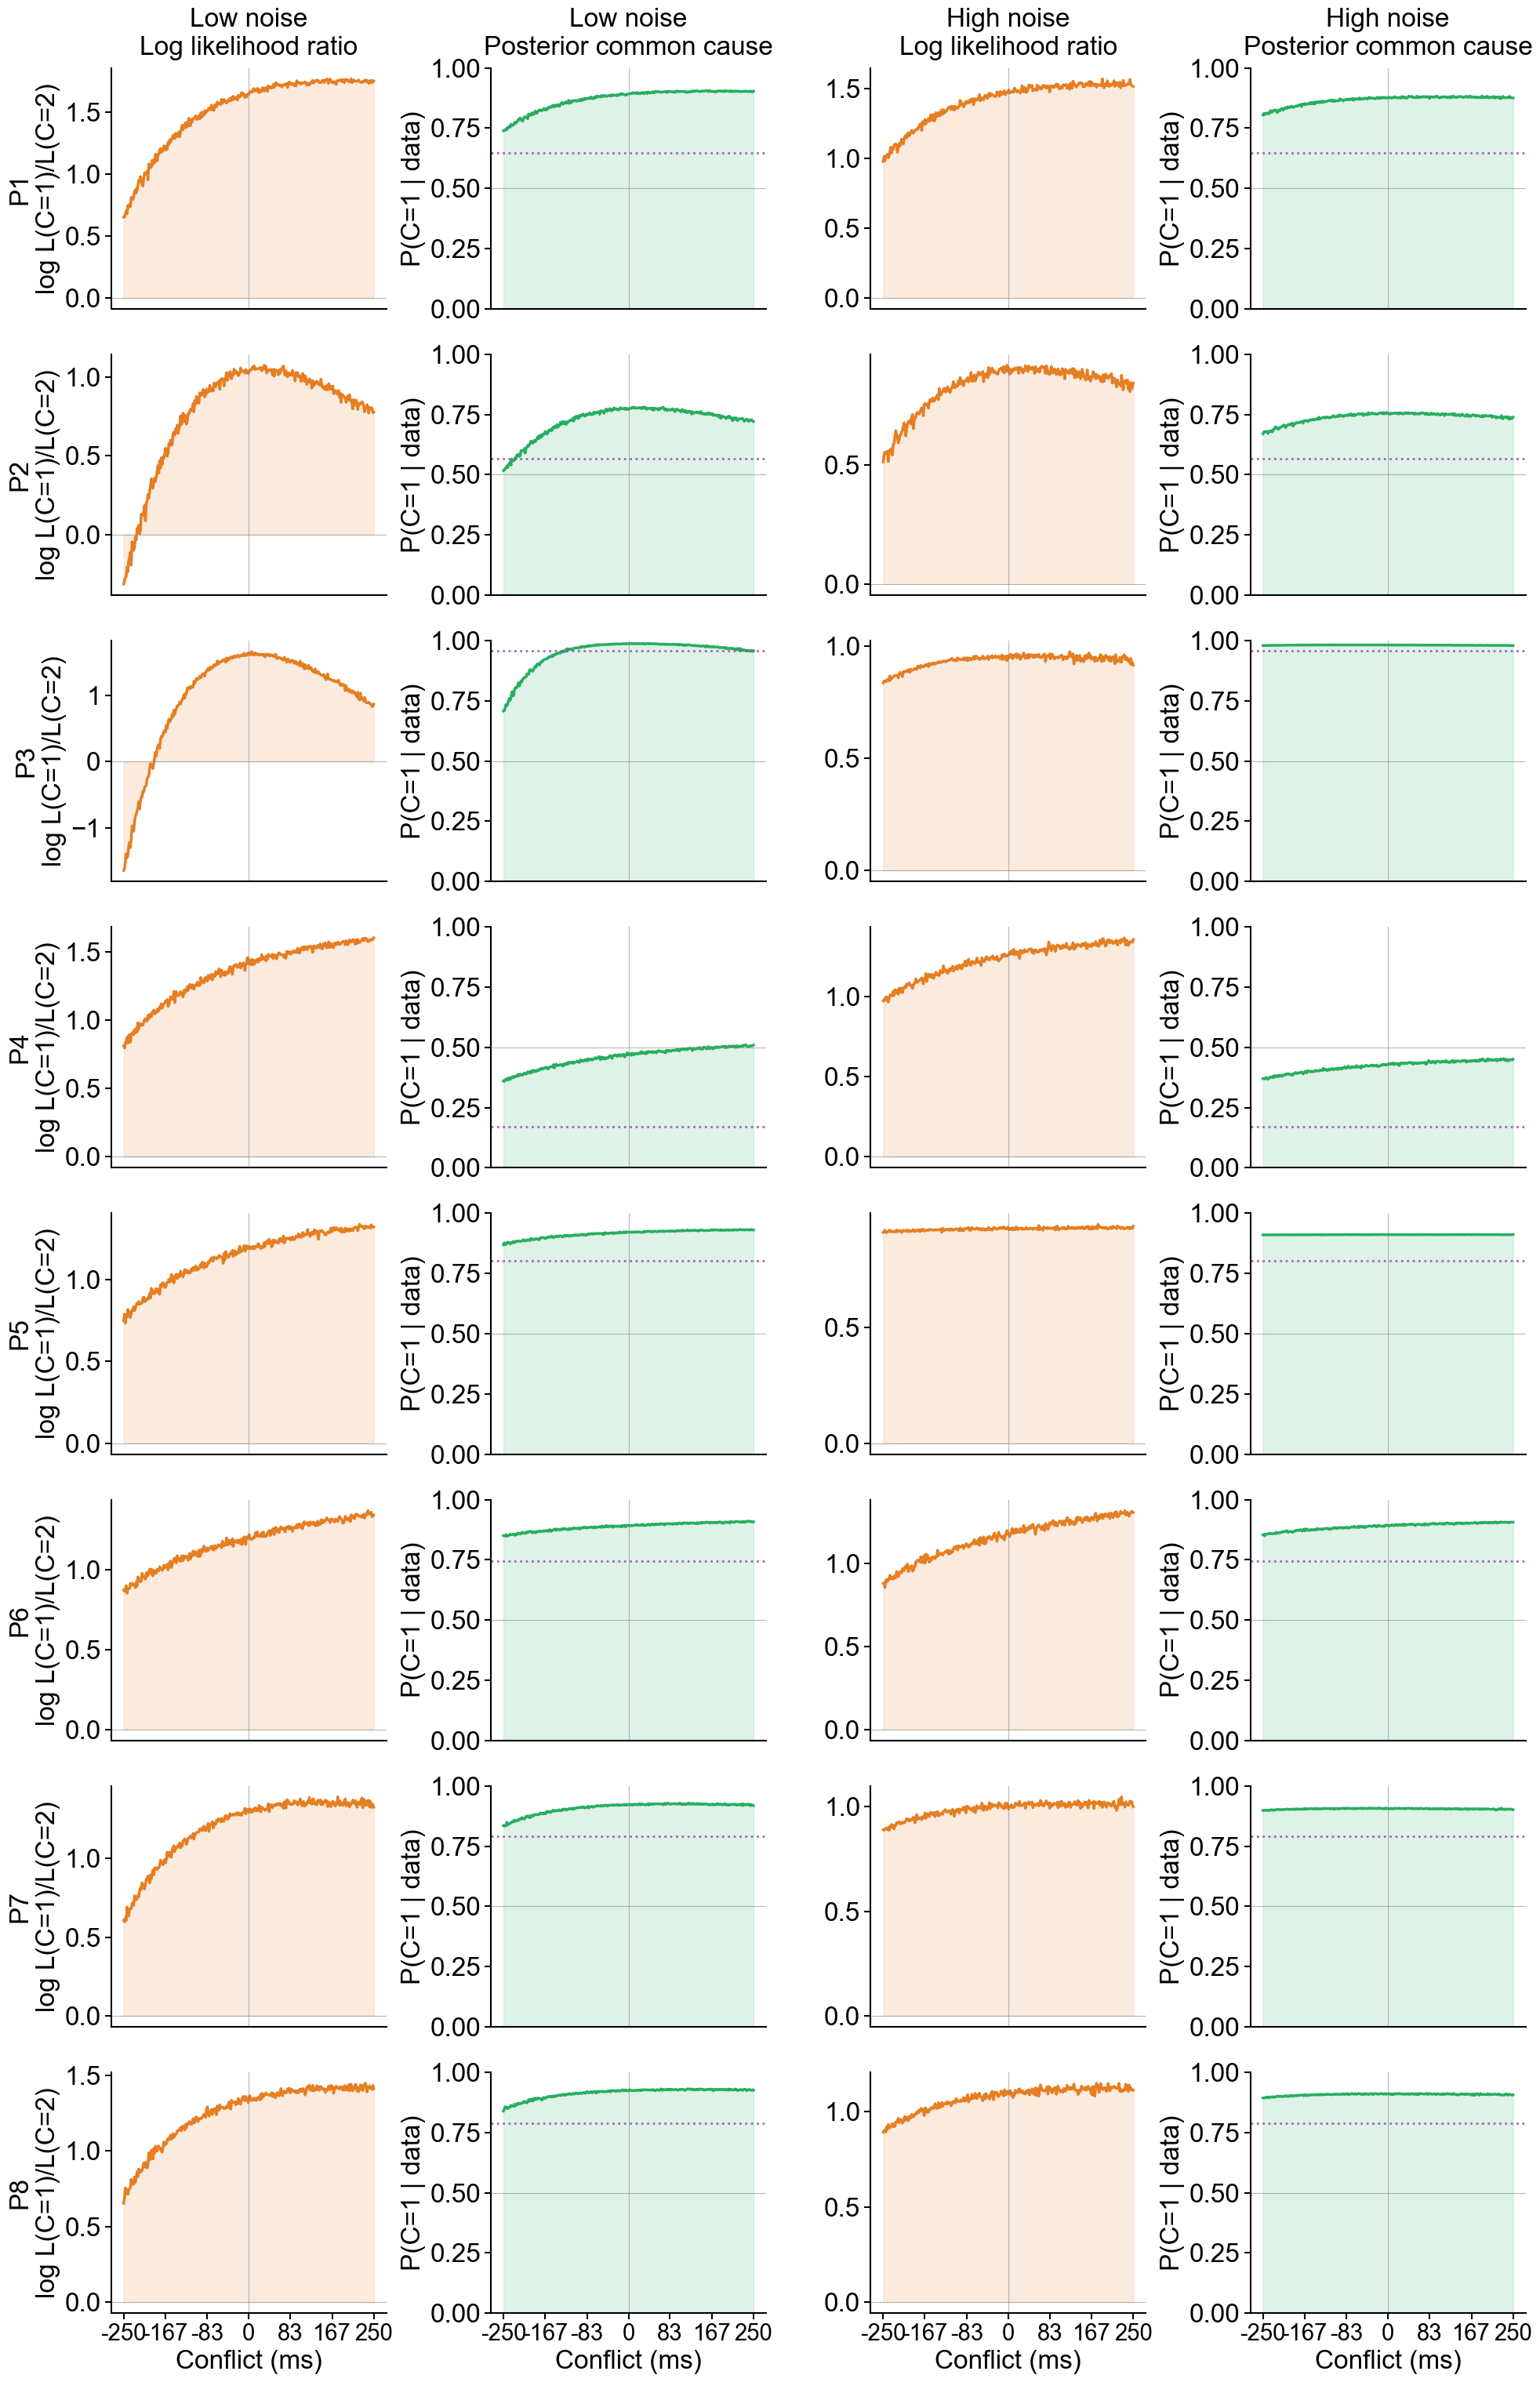

In [9]:

FONTSIZE = 24

def plot_ratio_and_posterior(sigma_a=0.3, sigma_v=0.3, p_c=0.5, t_min=0.1, t_max=3,
                             measurement="log-space", nSimul=2000, axes=None,
                             show_titles=True, show_xlabel=True):
    """
    Plot log likelihood ratio and posterior P(C=1) across conflict levels.
    Expects axes with 2 subplots [ratio_ax, posterior_ax].
    """
    conflicts = np.linspace(-0.25, +0.25, 300)
    post_c_means = []
    log_ratio_means = []

    S_a_s = 0.5

    for conflict in conflicts:
        S_v_s = S_a_s + conflict

        if measurement == "log-space" and S_v_s <= 0:
            log_ratio_means.append(np.nan)
            post_c_means.append(np.nan)
            continue

        if measurement == "log-space":
            m_a_s = np.random.normal(np.log(S_a_s), sigma_a, nSimul)
            m_v_s = np.random.normal(np.log(S_v_s), sigma_v, nSimul)
            t_min_use, t_max_use = np.log(t_min), np.log(t_max)
        else:
            m_a_s = np.random.normal(S_a_s, sigma_a, nSimul)
            m_v_s = np.random.normal(S_v_s, sigma_v, nSimul)
            t_min_use, t_max_use = t_min, t_max

        L1 = L_C1(m_a_s, m_v_s, sigma_a, sigma_v, t_min_use, t_max_use)
        L2 = L_C2(m_a_s, m_v_s, sigma_a, sigma_v, t_min_use, t_max_use)

        post_c1 = posterior_C1(m_a_s, m_v_s, sigma_a, sigma_v, p_c, t_min_use, t_max_use)
        post_c_means.append(np.mean(post_c1))

        with np.errstate(divide='ignore', invalid='ignore'):
            log_ratio = np.log(L1) - np.log(L2)
            log_ratio_means.append(np.mean(log_ratio))

    conflicts_ms = np.array(conflicts) * 1000

    # --- Plot 1: Log likelihood ratio ---
    ax_r = axes[0]
    ax_r.plot(conflicts_ms, log_ratio_means, color='#e67e22', linewidth=2.5)
    ax_r.fill_between(conflicts_ms, 0, log_ratio_means, alpha=0.15, color='#e67e22')
    ax_r.axhline(0, color='#888888', linestyle='-', linewidth=0.8, alpha=0.6)
    ax_r.axvline(0, color='#888888', linestyle='-', linewidth=0.8, alpha=0.6)

    if show_titles:
        ax_r.set_title('Log likelihood ratio', fontsize=FONTSIZE, pad=10)
    ax_r.spines['top'].set_visible(False)
    ax_r.spines['right'].set_visible(False)
    ax_r.tick_params(axis='both', labelsize=FONTSIZE)

    # --- Plot 2: Posterior P(C=1) ---
    ax_p = axes[1]
    ax_p.plot(conflicts_ms, post_c_means, color='#27ae60', linewidth=2.5)
    ax_p.fill_between(conflicts_ms, 0, post_c_means, alpha=0.15, color='#27ae60')
    ax_p.axhline(0.5, color='#888888', linestyle='-', linewidth=0.8, alpha=0.6)
    ax_p.axhline(p_c, color='#8e44ad', linestyle=':', linewidth=2, alpha=0.8)
    ax_p.axvline(0, color='#888888', linestyle='-', linewidth=0.8, alpha=0.6)
    ax_p.set_ylabel('P(C=1 | data)', fontsize=FONTSIZE)
    if show_titles:
        ax_p.set_title('Posterior common cause', fontsize=FONTSIZE, pad=10)
    ax_p.set_ylim([0, 1])
    ax_p.spines['top'].set_visible(False)
    ax_p.spines['right'].set_visible(False)
    ax_p.tick_params(axis='both', labelsize=FONTSIZE)

    # x-axis
    if show_xlabel:
        x_ticks = [-250, -167, -83, 0, 83, 167, 250]
        for ax in axes:
            ax.set_xticks(x_ticks)
            ax.set_xticklabels([str(t) for t in x_ticks], fontsize=FONTSIZE-3)
        axes[0].set_xlabel('Conflict (ms)', fontsize=FONTSIZE)
        axes[1].set_xlabel('Conflict (ms)', fontsize=FONTSIZE)
    else:
        for ax in axes:
            ax.set_xticks([])
            ax.set_xticklabels([])


def plotPosteriorsPerSubj(participantIds, modelTypes, parameterToPLot="mu"):
    lenSubjs = len(participantIds)
    nNoiseLevels = 2
    nPlotsPerNoise = 2  # ratio + posterior only

    n_cols = nNoiseLevels * nPlotsPerNoise  # 4 columns total
    fig, axes = plt.subplots(
        lenSubjs, n_cols,
        figsize=(5 * n_cols, 4 * lenSubjs),
        squeeze=False
    )
    plt.subplots_adjust(hspace=0.35, wspace=0.35, top=0.94)

    noise_labels = {0.1: "Low noise", 1.2: "High noise"}

    for pNum, participantID in enumerate(participantIds):
        for j, audioNoiseLevel in enumerate([0.1, 1.2]):
            # Load data and fit
            data, dataName = loadData.loadData(participantID + "_all.csv", verbose=False)
            mc_fitter = monteCarloClass.OmerMonteCarlo(data)
            mc_fitter.modelName = "lognorm"
            mc_fitter.freeP_c = False
            mc_fitter.sharedLambda = False
            mc_fitter.dataName = dataName
            res = loadResults.loadFitResults(mc_fitter, dataName, modelName=mc_fitter.modelName)
            mc_fitter.modelFit = res['fittedParams']

            sigma_v = mc_fitter.modelFit[2]
            p_c = mc_fitter.modelFit[3]
            sigma_a = mc_fitter.modelFit[1] if audioNoiseLevel == 0.1 else mc_fitter.modelFit[4]

            start_col = j * nPlotsPerNoise
            subplot_axes = [axes[pNum, start_col + k] for k in range(nPlotsPerNoise)]

            is_first_row = (pNum == 0)
            is_last_row = (pNum == lenSubjs - 1)

            plot_ratio_and_posterior(
                sigma_a=sigma_a, sigma_v=sigma_v, p_c=p_c,
                t_min=mc_fitter.data_t_min, t_max=mc_fitter.data_t_max,
                measurement="log-space",
                axes=subplot_axes,
                show_titles=is_first_row,
                show_xlabel=is_last_row
            )

            # Add participant + noise label on the left-most column of each noise block
            noise_label = noise_labels[audioNoiseLevel]
            if is_first_row:
                current_title = subplot_axes[0].get_title()
                subplot_axes[0].set_title(
                    f"{noise_label}\n{current_title}",
                    fontsize=FONTSIZE, pad=12
                )
                current_title_p = subplot_axes[1].get_title()
                subplot_axes[1].set_title(
                    f"{noise_label}\n{current_title_p}",
                    fontsize=FONTSIZE, pad=12
                )

        # Add participant label on y-axis of leftmost column
        axes[pNum, 0].set_ylabel(f'P{pNum+1}\nlog L(C=1)/L(C=2)', fontsize=FONTSIZE)
        if pNum == lenSubjs//2 - 1:
            axes[pNum, 0].set_ylabel(f'P{pNum+1}\nlog L(C=1)/L(C=2)', fontsize=FONTSIZE)

    plt.tight_layout(rect=(0, 0, 1, 0.96))
    fig.savefig("posterior_ratio_per_subject.png", dpi=600, format='png', bbox_inches='tight')
    plt.show()

# Run
plotPosteriorsPerSubj(participantIds[1:9], modelTypes, parameterToPLot="mu")
